In [1]:
import numpy as np
import pandas as pd

import plotly.express as px
import matplotlib.pyplot as plt
import scipy.constants as const

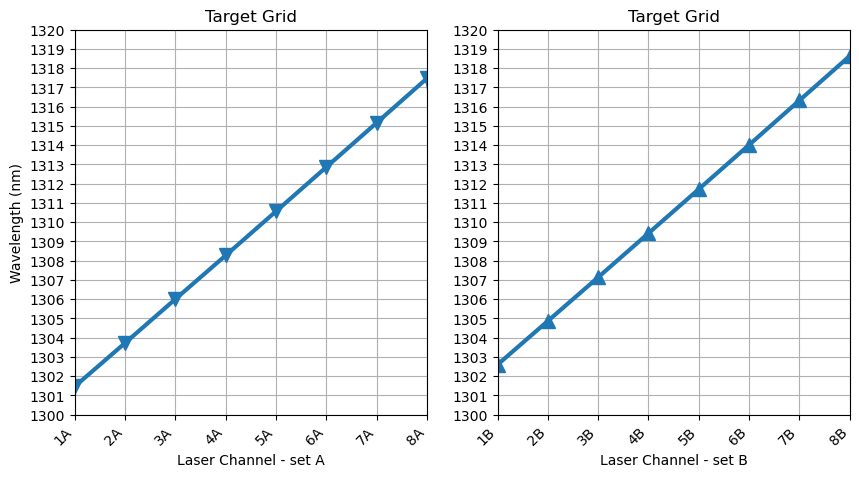

<Figure size 640x480 with 0 Axes>

In [2]:
target_grid = {'1A': 1301.47, '2A': 1303.73, '3A': 1306.01, '4A': 1308.28, '5A': 1310.57, '6A': 1312.87, '7A': 1315.17, '8A': 1317.48, '1B': 1302.6, '2B': 1304.87, '3B': 1307.14 ,'4B': 1309.43, '5B': 1311.72, '6B': 1314.02, '7B': 1316.33, '8B': 1318.64}

grid_temperature_sensitivity = 0.0091 #nm/C

plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.plot(target_grid.keys(), target_grid.values(), linewidth=3.0, marker='v', markersize=10)
plt.xticks(rotation=45, ha='right')
plt.xlim([-0, 7])
plt.ylim([1300, 1320])
plt.yticks(np.arange(1300, 1321, 1))
plt.xlabel('Laser Channel - set A')
plt.ylabel('Wavelength (nm)')
plt.title('Target Grid')
plt.grid(True)
plt.subplot(122)
plt.plot(target_grid.keys(), target_grid.values(), linewidth=3.0, marker='^', markersize=10)
plt.xticks(rotation=45, ha='right')
plt.xlim([8, 15])
plt.ylim([1300, 1320])
plt.yticks(np.arange(1300, 1321, 1))
plt.xlabel('Laser Channel - set B')
plt.title('Target Grid')
plt.grid(True)
plt.show()
plt.tight_layout()

In [3]:
# PD_112QTY = 'Testing_Report_Lightmatter_Datasheet_PD_QTY112_1605251727'
# LD_112QTY = 'Testing_Report_Lightmatter_Datasheet_LD_QTY112_1605251727'
PD_147QTY = 'Testing_Report_Lightmatter_Datasheet_PD_QTY147_1906251717'
LD_147QTY = 'Testing_Report_Lightmatter_Datasheet_LD_QTY147_1906251717'

In [4]:
PD_50C_df = pd.read_csv(PD_147QTY+'.csv')
# PD_50C_df.columns = PD_50C_df.loc[0].values
laser_combo = PD_50C_df['PD'].to_list()
target_wavelengths = np.array([target_grid[val] for val in laser_combo]).T
PD_50C_df['PD Wavelength (nm)'] = PD_50C_df['PD Wavelength (nm)'].astype(float)
PD_50C_df['PD 1dB Passband Width (nm)'] = PD_50C_df['PD 1dB Passband Width (nm)'].astype(float)
PD_50C_df['PD IL (dB)'] = PD_50C_df['PD IL (dB)'].astype(float)
PD_50C_df['Reference Loss (dB)'] = 1.3
PD_50C_df['Target Wavelength (nm)'] = target_wavelengths
PD_50C_df['Measured Temperature (C)'] = 25
PD_50C_df['Target Temperature (C)'] = 50
PD_50C_df['Corrected Wavelength (nm)'] = PD_50C_df['PD Wavelength (nm)'] + grid_temperature_sensitivity * PD_50C_df['Target Temperature (C)'] - grid_temperature_sensitivity * PD_50C_df['Measured Temperature (C)']
PD_50C_df['Wavelength error (nm)'] = PD_50C_df['Target Wavelength (nm)'] - PD_50C_df['Corrected Wavelength (nm)']
PD_50C_df['Frequency error (GHz)'] = const.c/ PD_50C_df['Target Wavelength (nm)'] - const.c / PD_50C_df['Corrected Wavelength (nm)']
PD_50C_df['PD On Chip Loss (dB)'] = PD_50C_df['PD IL (dB)'] - PD_50C_df['Reference Loss (dB)']

LD_50C_df = pd.read_csv(LD_147QTY+'.csv')
# LD_50C_df.drop(0, inplace=True)
laser_combo = LD_50C_df['Laser'].to_list()
target_wavelengths = np.array([target_grid[val] for val in laser_combo]).T
LD_50C_df['LD Wavelength (nm)'] = LD_50C_df['LD Wavelength (nm)'].astype(float)
LD_50C_df['LD 1dB Passband Width (nm)'] = LD_50C_df['LD 1dB Passband Width (nm)'].astype(float)
LD_50C_df['LD IL (dB)'] = LD_50C_df['LD IL (dB)'].astype(float)
LD_50C_df['Reference Loss (dB)'] = 1.3
LD_50C_df['Target Wavelength (nm)'] = target_wavelengths
LD_50C_df['Measured Temperature (C)'] = 25
LD_50C_df['Target Temperature (C)'] = 50
LD_50C_df['Corrected Wavelength (nm)'] = LD_50C_df['LD Wavelength (nm)'] + grid_temperature_sensitivity * LD_50C_df['Target Temperature (C)'] - grid_temperature_sensitivity * LD_50C_df['Measured Temperature (C)']
LD_50C_df['Wavelength error (nm)'] = LD_50C_df['Target Wavelength (nm)'] - LD_50C_df['Corrected Wavelength (nm)']
LD_50C_df['Frequency error (GHz)'] = const.c / LD_50C_df['Target Wavelength (nm)'] - const.c / LD_50C_df['Corrected Wavelength (nm)']
LD_50C_df['LD On Chip Loss (dB)'] = LD_50C_df['LD IL (dB)'] - LD_50C_df['Reference Loss (dB)']

In [5]:
PD_df = PD_50C_df.copy()
LD_df = LD_50C_df.copy()

LD_df["ch2ch Freq Diff (GHz)"] = np.NaN
PD_df["ch2ch Freq Diff (GHz)"] = np.NaN

for chip in LD_df['Chip ID'].unique():
  for ch in LD_df['Laser'].unique():
    ld_chip_df = LD_df[(LD_df['Chip ID'] == chip) & (LD_df['Laser'] == ch)]['Frequency error (GHz)']
    pd_chip_df = PD_df[(PD_df['Chip ID'] == chip) & (PD_df['PD'] == ch)]['Frequency error (GHz)']
    ch2ch_freq_diff = ld_chip_df.values[0] - pd_chip_df.values[0]
    LD_df.loc[LD_df.index == ld_chip_df.index[0], 'ch2ch Freq Diff (GHz)'] = ch2ch_freq_diff
    PD_df.loc[PD_df.index == pd_chip_df.index[0], 'ch2ch Freq Diff (GHz)'] = ch2ch_freq_diff

PD_df['Freq Pass'] = False
PD_df.loc[np.abs(PD_df['Frequency error (GHz)']) < 17.5, 'Freq Pass'] = True

for chip in PD_df['Chip ID'].unique():
  chip_df = PD_df[PD_df['Chip ID'] == chip]
  if len(chip_df['Freq Pass'].unique()) > 1:
    PD_df.loc[PD_df['Chip ID'] == chip, 'Freq Pass'] = False

chip_qty_freq_pass = int(np.sum(PD_df['Freq Pass'].to_list())/16)

LD_df['Loss Pass'] = False
LD_df.loc[np.abs(LD_df['LD On Chip Loss (dB)']) < 1.75 , 'Loss Pass'] = True

for chip in LD_df['Chip ID'].unique():
  chip_df = LD_df[LD_df['Chip ID'] == chip]
  if len(chip_df['Loss Pass'].unique()) > 1:
    LD_df.loc[LD_df['Chip ID'] == chip, 'Loss Pass'] = False

chip_qty_loss_pass = int(np.sum(LD_df['Loss Pass'].to_list())/16)

LD_df['Freq Offset Pass']  = False
LD_df.loc[np.abs(LD_df['ch2ch Freq Diff (GHz)']) < 25, 'Freq Offset Pass'] = True
for chip in LD_df['Chip ID'].unique():
  chip_df = LD_df[LD_df['Chip ID'] == chip]
  if len(chip_df['Freq Offset Pass'].unique()) > 1:
    LD_df.loc[LD_df['Chip ID'] == chip, 'Freq Offset Pass'] = False

chip_qty_freq_offset_pass = int(np.sum(LD_df['Freq Offset Pass'].to_list())/16)

LD_df['Screening'] = False
LD_df.loc[LD_df['Freq Offset Pass'] & LD_df['Loss Pass'] & PD_df['Freq Pass'], 'Screening'] = True
chip_qty_screening_pass = int(np.sum(LD_df['Screening'].to_list())/16)

In [6]:
fig = px.scatter(PD_df, x='PD', y='Frequency error (GHz)', color=PD_df['Chip ID'])
fig.update_traces(marker_size=10)
fig.update_xaxes(categoryorder='array', categoryarray= ['1A', '2A', '3A', '3A', '4A', '5A', '6A', '7A', '8A', '1B', '2B', '3B', '4B', '5B', '6B', '7B', '8B'])
fig.add_hline(y=-17, line_dash="dot",
    label=dict(
        text="Lower Spec",
        textposition="end",
        font=dict(size=20, color="black"),
        yanchor="top",
    ),)
fig.add_hline(y=17, line_dash="dot",
    label=dict(
        text="Upper Spec",
        textposition="end",
        font=dict(size=20, color="black"),
        yanchor="bottom",
    ),)
fig.update_layout(yaxis_range=[-20,20], title=dict(text="PD channel - Total "+str(len(PD_df['Chip ID'].unique()))+" Chips, Pass - " +str(chip_qty_freq_pass) + " Chips, Rest Failed", font=dict(size=33)))

In [7]:
fig = px.scatter(LD_df, x='Laser', y='Frequency error (GHz)', color=LD_df['Chip ID'])
fig.update_traces(marker_size=10)
fig.update_xaxes(categoryorder='array', categoryarray= ['1A', '2A', '3A', '3A', '4A', '5A', '6A', '7A', '8A', '1B', '2B', '3B', '4B', '5B', '6B', '7B', '8B'])
fig.update_layout(title=dict(text="LD channel - Total "+str(len(LD_df['Chip ID'].unique())) + " Chips", font=dict(size=33)))

In [8]:
fig = px.scatter(LD_df, x='Laser', y='LD On Chip Loss (dB)', color=LD_df['Chip ID'])
fig.update_traces(marker_size=10)
fig.update_xaxes(categoryorder='array', categoryarray= ['1A', '2A', '3A', '3A', '4A', '5A', '6A', '7A', '8A', '1B', '2B', '3B', '4B', '5B', '6B', '7B', '8B'])
fig.add_hline(y=1.75, line_dash="dot",
    label=dict(
        text="Upper Spec",
        textposition="end",
        font=dict(size=20, color="black"),
        yanchor="bottom",
    ),)
fig.update_layout(title=dict(text="LD channel - Total "+str(len(LD_df['Chip ID'].unique()))+" Chips, Loss Pass - " +str(chip_qty_loss_pass) + " Chips, Rest Failed", font=dict(size=33)))

In [9]:
fig = px.scatter(LD_df, x='Laser', y='ch2ch Freq Diff (GHz)', color=LD_df['Chip ID'])
fig.update_traces(marker_size=10)
fig.add_hline(y=25, line_dash="dot",
    label=dict(
        text="Upper Spec",
        textposition="end",
        font=dict(size=20, color="black"),
        yanchor="bottom",
    ),)
fig.add_hline(y=-25, line_dash="dot",
    label=dict(
        text="Upper Spec",
        textposition="end",
        font=dict(size=20, color="black"),
        yanchor="bottom",
    ),)
fig.update_xaxes(categoryorder='array', categoryarray= ['1A', '2A', '3A', '3A', '4A', '5A', '6A', '7A', '8A', '1B', '2B', '3B', '4B', '5B', '6B', '7B', '8B'])
fig.update_layout(yaxis_range=[-40,40], title=dict(text="LD2PD frequency different - Total "+str(len(PD_df['Chip ID'].unique()))+" Chips, Pass - " +str(chip_qty_freq_offset_pass) + " Chips, Rest Failed", font=dict(size=33)))

In [10]:
LD_df.to_csv('QTY112_LD_50C_df.csv')
PD_df.to_csv('QTY112_PD_50C_df.csv')

In [11]:
chip_summary = LD_df.copy()
chip_summary['PD Freq Pass'] = PD_df['Freq Pass']

In [12]:
chip_summary.to_csv('QTY112_chip_summary.csv', index=False)

In [13]:
chip_qty_screening_pass

144